**Комментарий от студента Титова Д.А.**

В блокноте исследуется предсказание модели DETR

От оригинального кода была добавлено отображение тестируемого изображения и

В сравнении с ранее изученными моделями, предназначенные для решения задач классификации, DETR не справился с обнаружением объекта-собаки на изображении с изменённой цветовой палитрой. Не помогло даже уменьшение параметра порогового значения обнаружения (theshhold) до 0.5. Тем не менее на оригинальном изображении без внесения цветовых корректировок объект обнаружился с высокой вероятностью

In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# initialize the model
processor = DetrImageProcessor.from_pretrained(
    "facebook/detr-resnet-101", revision="no_timm"
)
model = DetrForObjectDetection.from_pretrained(
    "facebook/detr-resnet-101", revision="no_timm"
)

# preprocess the inputs and infer
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# non max supression above 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.9
)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/79.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/243M [00:00<?, ?B/s]

Detected cat with confidence 0.998 at location [344.06, 24.85, 640.34, 373.74]
Detected remote with confidence 0.997 at location [328.13, 75.93, 372.81, 187.66]
Detected remote with confidence 0.997 at location [39.34, 70.13, 175.56, 118.78]
Detected cat with confidence 0.998 at location [15.36, 51.75, 316.89, 471.16]
Detected couch with confidence 0.995 at location [-0.19, 0.71, 639.73, 474.17]


Detected cat with confidence 0.998 at location [344.06, 24.85, 640.34, 373.74]
Detected remote with confidence 0.997 at location [328.13, 75.93, 372.81, 187.66]
Detected remote with confidence 0.997 at location [39.34, 70.13, 175.56, 118.78]
Detected cat with confidence 0.998 at location [15.36, 51.75, 316.89, 471.16]
Detected couch with confidence 0.995 at location [-0.19, 0.71, 639.73, 474.17]


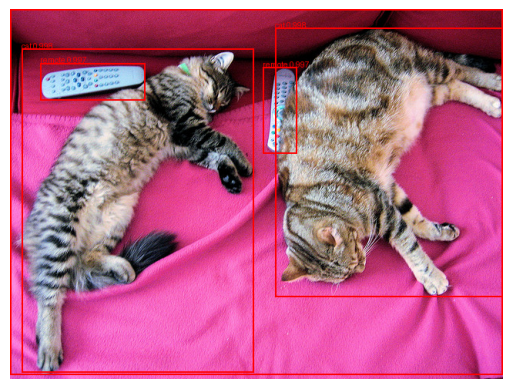

In [5]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Create a copy of the image to draw the bounding boxes on
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = model.config.id2label[label.item()]
    draw.rectangle(box, outline="red", width=2)
    draw.text((box[0], box[1] - 10), f"{label_name} {round(score.item(), 3)}", fill="red")
    print(
        f"Detected {label_name} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

# Display the image with bounding boxes using matplotlib
plt.imshow(image_with_boxes)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [11]:
from google.colab import files
from io import BytesIO

# Upload the image
upload = files.upload()
filename = next(iter(upload)) # Get filename

Saving photo_2025-05-31_18-59-35.jpg to photo_2025-05-31_18-59-35 (1).jpg


Detected person with confidence 0.718 at location [442.53, 303.34, 961.08, 1079.79]
Detected tv with confidence 0.835 at location [-0.31, -0.74, 959.68, 1279.21]
Detected person with confidence 0.688 at location [501.64, 203.96, 606.85, 459.45]
Detected person with confidence 0.72 at location [384.35, 171.23, 547.01, 454.68]
Detected person with confidence 0.564 at location [160.28, 292.15, 551.19, 952.2]
Detected person with confidence 0.837 at location [111.87, 284.67, 959.73, 1094.8]
Detected person with confidence 0.506 at location [508.09, 266.96, 555.77, 407.57]
Detected person with confidence 0.591 at location [159.88, 167.83, 455.24, 507.6]


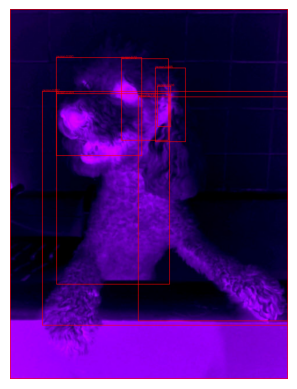

In [12]:
# Open the image
try:
    image = Image.open(BytesIO(upload[filename]))
except Exception as e:
    print(f"Error opening image: {e}")
    exit()


# preprocess the inputs and infer
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# non max supression above 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.5
)[0]

# Create a copy of the image to draw the bounding boxes on
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = model.config.id2label[label.item()]
    draw.rectangle(box, outline="red", width=2)
    draw.text((box[0], box[1] - 10), f"{label_name} {round(score.item(), 3)}", fill="red")
    print(
        f"Detected {label_name} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

# Display the image with bounding boxes using matplotlib
plt.imshow(image_with_boxes)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [8]:
# Upload the image
upload = files.upload()
filename = next(iter(upload)) # Get filename

Saving photo_2025-05-31_18-51-55.jpg to photo_2025-05-31_18-51-55.jpg


Detected dog with confidence 0.998 at location [111.42, 77.59, 950.25, 1209.22]


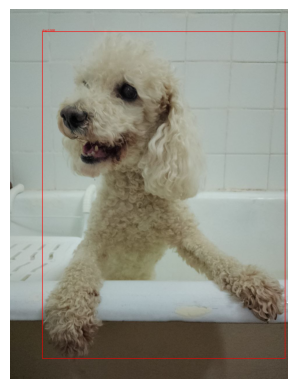

In [9]:
# Open the image
try:
    image = Image.open(BytesIO(upload[filename]))
except Exception as e:
    print(f"Error opening image: {e}")
    exit()


# preprocess the inputs and infer
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# non max supression above 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.9
)[0]

# Create a copy of the image to draw the bounding boxes on
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = model.config.id2label[label.item()]
    draw.rectangle(box, outline="red", width=2)
    draw.text((box[0], box[1] - 10), f"{label_name} {round(score.item(), 3)}", fill="red")
    print(
        f"Detected {label_name} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

# Display the image with bounding boxes using matplotlib
plt.imshow(image_with_boxes)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()